This notebook includes markdown cells (such as this one), which provide useful information and narration of what is happening, and code cells (such as the next one), which actually do things.  To execute a code cells, click in the cell and then hit Shift+Enter.  Alternatively, click within a cell and hit the Run button (play symbol) in the toolbar, above.  You can also execute some or all of the cells via options in the 'Run' menu, above.  We recommend executing the code cells one by one and interacting with the outputs to get the most out of this tutorial. You can also start executing cells in any numbered section without running the previous sections (other than the first two code blocks, below).

In [1]:
# import all of the packages we're going to use
import matplotlib.pyplot as plt
import numpy as np
import copy
import EXOSIMS.MissionSim
import astropy.units as u
import scipy
from matplotlib import ticker
import matplotlib.colors
import warnings

In [2]:
# set up plotting
%matplotlib widget
plt.rcParams.update({"figure.max_open_warning": 0})

# 1. Building and Interacting with Simulation Objects

In order to create a mission simulation, we need an input specification.  Let's define one with all default values, except for a real input star catalog:

In [3]:
specs0 = {
    "modules": {
        "PlanetPopulation": " ",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": " ",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": " ",
        "TargetList": " ",
        "SimulatedUniverse": " ",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}

We now create a `MissionSim` object, which will automatically build and pre-compute all the quantities we need to simulate a mission. Note that for this tutorial, pre-computed values have been automatically loaded to speed up execution time.  Running the same commands with different inputs can result in *much* longer execution times.

In [4]:
sim0 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs0))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 553023802
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds2

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


Note that a *lot* of defaults have been set. Let's take a look at some of the default values being used, starting with which modules were loaded:

In [5]:
sim0.modules

{'PlanetPopulation': <EXOSIMS.Prototypes.PlanetPopulation.PlanetPopulation at 0x1587e90d0>,
 'PlanetPhysicalModel': <EXOSIMS.Prototypes.PlanetPhysicalModel.PlanetPhysicalModel at 0x1576ec7d0>,
 'OpticalSystem': <EXOSIMS.Prototypes.OpticalSystem.OpticalSystem at 0x1587b5c10>,
 'ZodiacalLight': <EXOSIMS.Prototypes.ZodiacalLight.ZodiacalLight at 0x1587a6bd0>,
 'BackgroundSources': <EXOSIMS.Prototypes.BackgroundSources.BackgroundSources at 0x1587e8b90>,
 'PostProcessing': <EXOSIMS.Prototypes.PostProcessing.PostProcessing at 0x1587cbb50>,
 'Completeness': <EXOSIMS.Prototypes.Completeness.Completeness at 0x1587cea10>,
 'TargetList': <EXOSIMS.Prototypes.TargetList.TargetList at 0x151f51ad0>,
 'SimulatedUniverse': <EXOSIMS.Prototypes.SimulatedUniverse.SimulatedUniverse at 0x152987090>,
 'Observatory': <EXOSIMS.Prototypes.Observatory.Observatory at 0x152d5be50>,
 'TimeKeeping': <EXOSIMS.Prototypes.TimeKeeping.TimeKeeping at 0x1587a9ed0>,
 'SurveySimulation': <EXOSIMS.Prototypes.SurveySimulation

These modules make up the `EXOSIMS` framework and are all available as attributes of the top-level `MissionSim` object (the one we just created as `sim`).  Regardless of which specific implementations get loaded, the attribute names referring to them are always the same. Certain modules are also available as attributes of others, based on `EXOSIMS` instantiation tree (see here for details: https://exosims.readthedocs.io/en/latest/intro.html#framework). As an example, we can show that the `PlanetPopulation` attribute of `MissionSim` is the same as the `PlanetPopulation` attribute of the `TargetList`. 

In [6]:
sim0.PlanetPopulation is sim0.TargetList.PlanetPopulation

True

Next, we can explore specific parameters that are user-settable (but in this case got set to default values). We start with the `OpticalSystem` (https://exosims.readthedocs.io/en/latest/opticalsystem.html):

In [7]:
print(f"Pupil Diameter: {sim0.OpticalSystem.pupilDiam}")
print(f"Single-observation integration time limit: {sim0.OpticalSystem.intCutoff}")
print(
    f"Observing mode central wavelength: {sim0.OpticalSystem.observingModes[0]['lam']}"
)
print(
    f"Observing mode IWA/OWA: {sim0.OpticalSystem.observingModes[0]['IWA']}/ "
    f"{sim0.OpticalSystem.observingModes[0]['OWA']}"
)

Pupil Diameter: 4.0 m
Single-observation integration time limit: 50.0 d
Observing mode central wavelength: 500.0 nm
Observing mode IWA/OWA: 0.1 arcsec/ 10.0 arcsec


We can also see what kind of contrast and throughput we're expecting.  These are both functions of wavelength and angular separation (see https://exosims.readthedocs.io/en/latest/opticalsystem.html#required-prototype-starlight-suppression-system-parameters for details). We'll check at the central wavelength and inner working angle:

In [8]:
print(
    "Starlight Suppression system contrast @0.1 arcsec: "
    f"{sim0.OpticalSystem.starlightSuppressionSystems[0]['core_contrast'](500*u.nm, 0.1*u.arcsec)[0] :.2e}"
)
print(
    "Starlight Suppression system core throughput @0.1 arcsec: "
    f"{sim0.OpticalSystem.starlightSuppressionSystems[0]['core_thruput'](500*u.nm, 0.1*u.arcsec)[0]}"
)

Starlight Suppression system contrast @0.1 arcsec: 1.00e-10
Starlight Suppression system core throughput @0.1 arcsec: 0.1


We can also get some information about our science instrument (https://exosims.readthedocs.io/en/latest/opticalsystem.html#science-instruments):

In [9]:
print(
    "Science Instrument QE @500 nm: "
    f"{sim0.OpticalSystem.scienceInstruments[0]['QE'](500*u.nm)[0]}"
)
print(
    f"Science Instrument pixel scale: {sim0.OpticalSystem.scienceInstruments[0]['pixelScale']}"
)
print(
    f"Science Instrument dark current: {sim0.OpticalSystem.scienceInstruments[0]['idark']}"
)
print(
    f"Science Instrument read noise (e): {sim0.OpticalSystem.scienceInstruments[0]['sread']}"
)

Science Instrument QE @500 nm: 0.9 1 / ph
Science Instrument pixel scale: 0.02 arcsec
Science Instrument dark current: 0.0001 1 / s
Science Instrument read noise (e): 1e-06


Let's also take a look at our target list (https://exosims.readthedocs.io/en/latest/targetlist.html):

In [10]:
print(f"Number of targets: {sim0.TargetList.nStars}")
print(f"Min/Max Target V mag: {sim0.TargetList.Vmag.min()}/{sim0.TargetList.Vmag.max()}")
print(
    f"Min/Max Target distance: {sim0.TargetList.dist.min()}/{sim0.TargetList.dist.max()}"
)

Number of targets: 134
Min/Max Target V mag: 2.82/7.421
Min/Max Target distance: 2.5461 pc/22.7302 pc


If you read the HWO Mission star list documentation (https://exoplanetarchive.ipac.caltech.edu/docs/2645_NASA_ExEP_Target_List_HWO_Documentation_2023.pdf), you'll notice that it includes 164 targets.  Why are only 134 included here?  Let's ask the code to explain:

In [11]:
# we'll create a new input specification and object so we can
# revisit the original one later, if desired.
specs1 = copy.deepcopy(specs0)
specs1["explainFiltering"] = True
sim1 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs1))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 57369867
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
164 targets imported from star catalog.
16

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


30 of the targets have bright companions within 10 arcsec, and are removed by default.  We can prevent this, if desired:

In [12]:
specs1["filterBinaries"] = False
sim1 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs1))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 418274537
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
164 targets imported from star catalog.
1

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


In [13]:
print(f"Number of targets: {sim1.TargetList.nStars}")
print(
    f"Min/Max Target V mag: {sim1.TargetList.Vmag.min()}/{sim1.TargetList.Vmag.max()}"
)
print(
    f"Min/Max Target distance: {sim1.TargetList.dist.min()}/{sim1.TargetList.dist.max()}"
)

Number of targets: 164
Min/Max Target V mag: 0.002/7.421
Min/Max Target distance: 1.3319 pc/23.2606 pc


As we now have two different `MissionSim` objects (and two sets of underlying module objects) we can compare them.  Let's see the exact set of stars that were initially filtered out:

In [14]:
print(set(sim1.TargetList.Name) - set(sim0.TargetList.Name))

{'HIP 45038 A', 'HIP 114046', 'HIP 64797 A', 'HIP 47080 A', 'HIP 88601 A', 'HIP 77052 A', 'HIP 107350', 'HIP 38423 A', 'HIP 111449 A', 'HIP 69965 A', 'HIP 72659 A', 'HIP 95447', 'HIP 99461 A', 'HIP 40693', 'HIP 14879 A', 'HIP 89348', 'HIP 29271 A', 'HIP 59199 A', 'HIP 84893 A', 'HIP 72659 B', 'HIP 64583 A', 'HIP 29650', 'HIP 5896 A', 'HIP 88601 B', 'HIP 86736', 'HIP 23835', 'HIP 84405 A', 'HIP 84405 B', 'HIP 71683', 'HIP 71681'}


# 2. Target Achievable $\Delta$mag Values

Let's create a new `MissionSim` object with one minor modification: by default, EXOSIMS will not compute the saturation completeness or associated $\Delta\textrm{mag}$ values (effectively infinite integration time - for more details see: https://exosims.readthedocs.io/en/latest/concepts.html#completeness-integration-time-and-delta-textrm-mag).  However, we can toggle this on by adding a single boolean to our input specification:

In [15]:
specs1 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "modules": {
        "PlanetPopulation": " ",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": " ",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": " ",
        "TargetList": " ",
        "SimulatedUniverse": " ",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}
sim1 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs1))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 54789238
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds26

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


We can now see how all of these translate to achievable $\Delta\textrm{mag}$ values for our target list.  We'll look at the maximum integration time value and the saturation value:

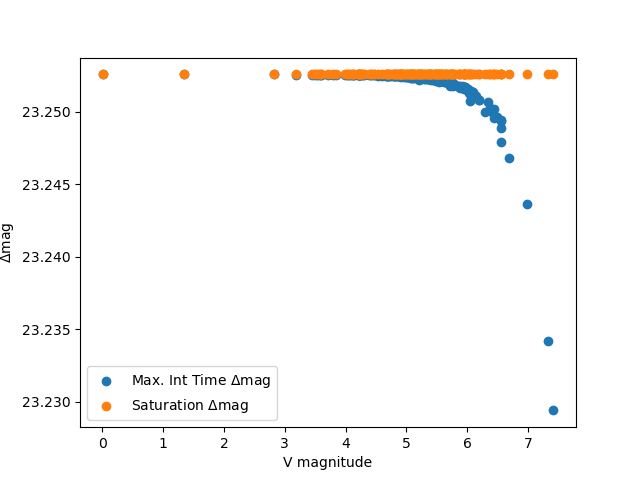

In [16]:
TL1 = sim1.TargetList  # assign TargetList object for easier access
plt.figure()
plt.scatter(TL1.Vmag, TL1.intCutoff_dMag, label="Max. Int Time $\\Delta$mag")
plt.scatter(TL1.Vmag, TL1.saturation_dMag, label="Saturation $\\Delta$mag")
plt.legend()
plt.xlabel("V magnitude")
plt.ylabel("$\\Delta$mag");

That's odd.  I thought we had $10^{-10}$ contrast. Why are we saturating at only a bit above 23 and not closer to 25 $\Delta\textrm{mag}$ (which is $10^{-10}$ on the magnitude scale)? 

The reason is that our integration time model assumes a noise floor set by the residual starlight leaking through the coronagraph. This is attenuated by an assumed post-processing gain. There is also a stability factor that models overall PSF stability. Let's see what that these values default to:

In [17]:
print(f"Post-Processing gain: {TL1.PostProcessing._outspec['ppFact']}")
print(f"Stability Factor: {TL1.OpticalSystem.stabilityFact}")

Post-Processing gain: 1.0
Stability Factor: 1.0


Well, that's the problem right there.  We're not attenuating the residual speckle at all.  Let's fix that and see how it changes things.  We'll assume that we can beat down the speckle residual (via some form of post-processing) by a factor of 10 and re-create the same plot:

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 910216694
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds2

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


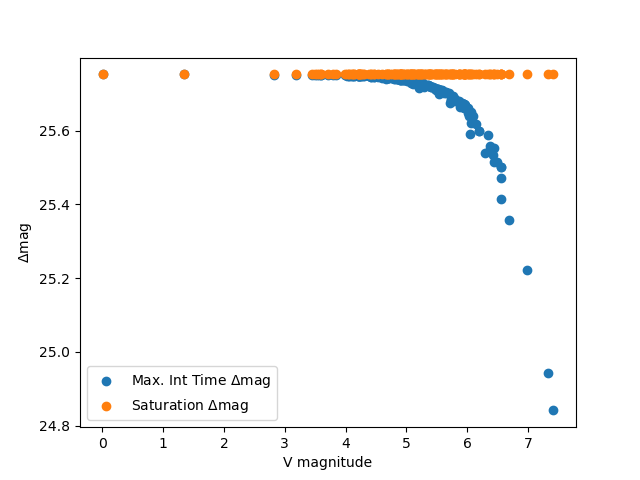

In [18]:
specs2 = copy.deepcopy(specs1)
specs2["ppFact"] = 0.1
sim2 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs2))
TL2 = sim2.TargetList
plt.figure()
plt.scatter(TL2.Vmag, TL2.intCutoff_dMag, label="Max. Int Time $\\Delta$mag")
plt.scatter(TL2.Vmag, TL2.saturation_dMag, label="Saturation $\\Delta$mag")
plt.legend()
plt.xlabel("V magnitude")
plt.ylabel("$\\Delta$mag");

Much better! We are now modeling an optical system that has a reasonable chance of being able to detect Earth-like planets.

# 3. Planet Populations

Now let's take a look at what kind of synthetic planets we're creating.  First we make a new `MissionSim` object with all of the settings we've accumulated so far:

In [19]:
specs2 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "ppFact": 0.1,
    "modules": {
        "PlanetPopulation": " ",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": " ",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": " ",
        "TargetList": " ",
        "SimulatedUniverse": " ",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}
sim2 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs2))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 299716456
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds2

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


Now we can look at multiple attributes to get a sense of the planet sample we're generating:

In [20]:
print(f"Assumed occurrence rate: {sim2.PlanetPopulation.eta}")
print(f"Number of stars in target list: {sim2.TargetList.nStars}")
print(f"Number of planets in synthetic universe: {sim2.SimulatedUniverse.nPlans}")

Assumed occurrence rate: 0.1
Number of stars in target list: 164
Number of planets in synthetic universe: 17


You might notice that the number of planets not exactly equal to $\eta N_\textrm{stars}$ (we can't say for sure, because a different random draw occurs for every user of this sheet, every time it is run, so the number of planets you see in the previous output will be different each time). 

The reason why you won't always get exactly $\eta N_\textrm{stars}$ planets is because we treat $\eta$ as the rate parameter of a Poisson random variable.  

We're also not producing a lot of planets, so for visualization purposes, let's increase the occurrence rate:

In [21]:
specs3 = copy.deepcopy(specs2)
specs3["eta"] = 3
sim3 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs3))
print(f"Assumed occurrence rate: {sim3.PlanetPopulation.eta}")
print(f"Number of stars in target list: {sim3.TargetList.nStars}")
print(f"Number of planets in synthetic universe: {sim3.SimulatedUniverse.nPlans}")

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 108838090
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds2

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


Let's take a look at some of the planets' physical and orbital attributes:

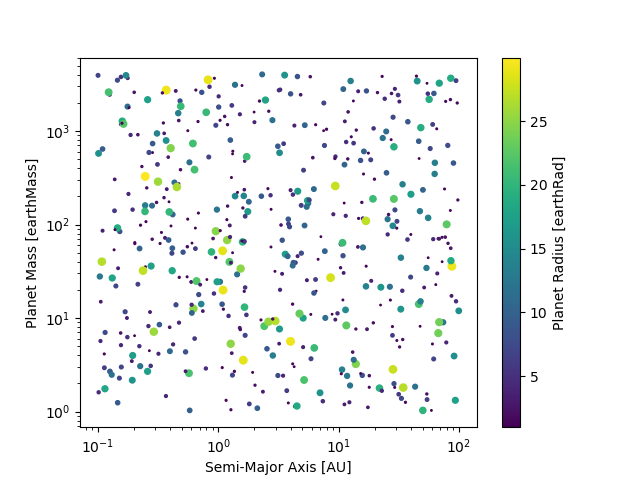

In [22]:
fig, ax = plt.subplots()
pts = ax.scatter(
    sim3.SimulatedUniverse.a,
    sim3.SimulatedUniverse.Mp,
    s=sim3.SimulatedUniverse.Rp.value,
    c=sim3.SimulatedUniverse.Rp.value,
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(f"Planet Mass [{sim3.SimulatedUniverse.Mp.unit}]")
ax.set_xlabel(f"Semi-Major Axis [{sim3.SimulatedUniverse.a.unit}]")
plt.colorbar(pts, label=f"Planet Radius [{sim3.SimulatedUniverse.Rp.unit}]");

That seems like a really odd-looking planet population.  Because we haven't selected a specific planet population to model, planets were generated using log-normal distributions for mass and semi-major axis, and the planet radius is decoupled from the planet mass.  This is obviously non-physical (although occasionally useful for various testing purposes) - let's dial in a real planet population. We'll use the population defined by the SAG13 final report (https://exoplanets.nasa.gov/system/presentations/files/67_Belikov_SAG13_ExoPAG16_draft_v4.pdf):

In [23]:
specs4 = copy.deepcopy(specs3)
specs4["modules"]["PlanetPopulation"] = "SAG13"
specs4["modules"]["SimulatedUniverse"] = "SAG13Universe"
sim4 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs4))
print(f"Assumed occurrence rate: {sim4.PlanetPopulation.eta}")
print(f"Number of stars in target list: {sim4.TargetList.nStars}")
print(f"Number of planets in synthetic universe: {sim4.SimulatedUniverse.nPlans}")

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 402114512
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds264/.EXO

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


Note that our previously set $\eta$ input was ignored and overwritten by this particular family of modules. 

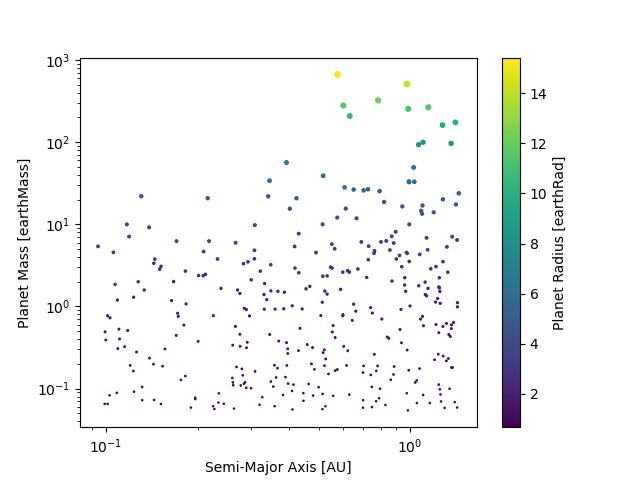

In [24]:
fig, ax = plt.subplots()
pts = ax.scatter(
    sim4.SimulatedUniverse.a,
    sim4.SimulatedUniverse.Mp,
    s=sim4.SimulatedUniverse.Rp.value,
    c=sim4.SimulatedUniverse.Rp.value,
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(f"Planet Mass [{sim4.SimulatedUniverse.Mp.unit}]")
ax.set_xlabel(f"Semi-Major Axis [{sim4.SimulatedUniverse.a.unit}]")
plt.colorbar(pts, label=f"Planet Radius [{sim4.SimulatedUniverse.Rp.unit}]");

We are now generating planets with self-consistent masses and radii, and generating significantly more Earth-mass objects than Jovian-mass objects. However, the original SAG13 population is only defined for relatively short-period planets.  We can see the exact range of semi-major axes we're generating:

In [25]:
print(f"Semi-major axis range: {sim4.PlanetPopulation.arange}")

Semi-major axis range: [0.09084645 1.45354324] AU


Let's extrapolate a bit:

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 381287584
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds264/.EXO

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


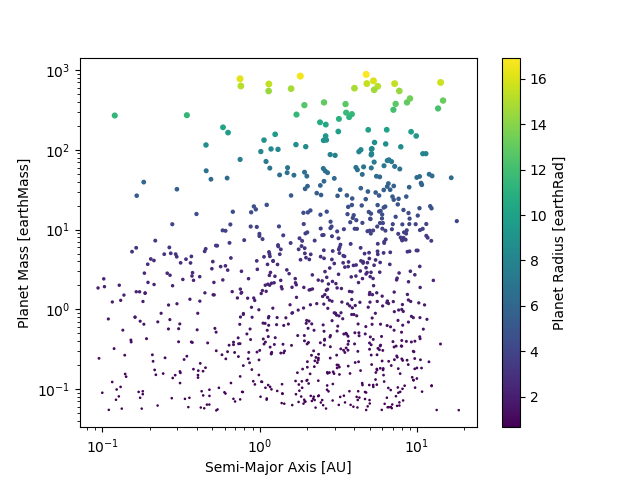

In [26]:
specs5 = copy.deepcopy(specs4)
specs5["arange"] = [0.09084645, 30]
specs5["smaknee"] = 10
sim5 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs5))
print(f"Assumed occurrence rate: {sim5.PlanetPopulation.eta}")
print(f"Number of stars in target list: {sim5.TargetList.nStars}")
print(f"Number of planets in synthetic universe: {sim5.SimulatedUniverse.nPlans}")

fig, ax = plt.subplots()
pts = ax.scatter(
    sim5.SimulatedUniverse.a,
    sim5.SimulatedUniverse.Mp,
    s=sim5.SimulatedUniverse.Rp.value,
    c=sim5.SimulatedUniverse.Rp.value,
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(f"Planet Mass [{sim5.SimulatedUniverse.Mp.unit}]")
ax.set_xlabel(f"Semi-Major Axis [{sim5.SimulatedUniverse.a.unit}]")
plt.colorbar(pts, label=f"Planet Radius [{sim5.SimulatedUniverse.Rp.unit}]");

Note that even though we permitted the semi-major axis range to go all the way to 30 AU, we're not generating planets out there.  That's because this implementation includes an exponential drop-off past the separation set by the ``smaknee`` parameter, which we set to 10 AU.

# 4. Completeness

At this point, we have a (somewhat) reasonable-looking set of synthetic planets, a target list, and a workable optical system.  The last element we're missing is the ability compute completeness.  So far, we have been utilizing the prototype completeness modules, which doesn't actually compute real completeness values (in the interest of execution time). Instead, it sets every completeness value for every target to an arbitrary, identical, value:

In [27]:
specs5 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "ppFact": 0.1,
    "eta": 3,
    "arange": [0.09084645, 30],
    "smaknee": 10,
    "modules": {
        "PlanetPopulation": "SAG13",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": " ",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": " ",
        "TargetList": " ",
        "SimulatedUniverse": "SAG13Universe",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}
sim5 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs5))
sim5.TargetList.int_comp

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 923244390
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /Users/ds264/.EXO

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

Let's replace this with a real completeness calculation, and also limit ourselves to a somewhat restricted field of view.  Note that this will execute relatively quickly because we have pre-cached the relevant result for this tutorial.  Changing the planet population will require a re-computation of the joint density function, which can take a while (but then those results will be cached as well). We're going to use a Monte-Carlo based approach to computing Completeness, which is named in honor of Bob Brown, who originally introduced this methodology in his 2005 paper:

In [28]:
specs6 = copy.deepcopy(specs5)
specs6["modules"]["Completeness"] = "BrownCompleteness"
specs6["FoV"] = 2.0  # arcseconds
sim6 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs6))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 511605552
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported BrownCompleteness (implementation) from EXOSIMS.Completeness.BrownCompleteness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loading cached completeness fil

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


We can now look at what kind of completeness values we can achieve for our target list.  We'll consider the case of integrating to a nominal $\Delta$mag (defaulting to 25) for each target, and the case of integrating for an effectively infinite amount of time:

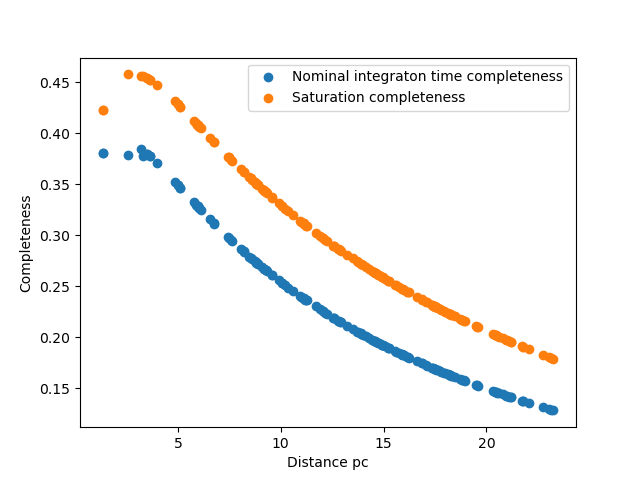

In [29]:
TL = sim6.TargetList
plt.figure()
plt.scatter(TL.dist, TL.int_comp, label="Nominal integraton time completeness")
plt.scatter(TL.dist, TL.saturation_comp, label="Saturation completeness")
plt.legend()
plt.xlabel(f"Distance {TL.dist.unit}")
plt.ylabel("Completeness");

This gives us a sense of how the completeness behaves as a function of integration time, but only for two data points.  We can also look in more detail for a particular target.  Let's pick a somewhat bright star beyond 5 parsecs:

In [30]:
TL = sim6.TargetList
sInd = np.where((TL.Vmag <= 7) & (TL.dist >= 5 * u.pc))[0][0]
print(f"We'll be focusing on {TL.Name[sInd]}.")
print(f"This target has a V mag of {TL.Vmag[sInd]} and is {TL.dist[sInd]} from Earth.")
print(
    f"This target has a saturation dMag of {TL.saturation_dMag[sInd] :.2f}, "
    f"and requires {TL.int_tmin[sInd].to(u.h) :.2f} of integration to get to a dMag "
    f"of {TL.int_dMag[sInd]}"
)

We'll be focusing on HIP 41926.
This target has a V mag of 6.378 and is 12.1643 pc from Earth.
This target has a saturation dMag of 25.75, and requires 88.44 h of integration to get to a dMag of 25.0


Let's take a look at how instrumental constraints interact with the planet population for this target:

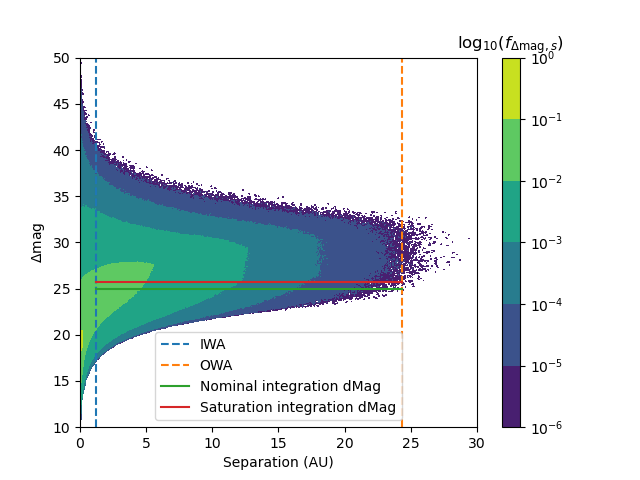

In [31]:
TL = sim6.TargetList # grab the TargetList
# grab the first (and only) observing mode:
mode = sim6.OpticalSystem.observingModes[0] 
fig = plt.figure()
ax = fig.add_subplot(111)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cs = ax.contourf(
        TL.Completeness.xnew,
        TL.Completeness.ynew,
        TL.Completeness.Cpdf,
        locator=ticker.LogLocator(),
    )
ax.set_xlabel("Separation (AU)")
ax.set_ylabel("$\Delta$mag")
cbar = fig.colorbar(cs)
cbar.ax.set_title("log$_{10}(f_{\Delta\\mathrm{mag},s})$")
projIWA = np.tan(mode["IWA"]) * TL.dist[sInd]
projOWA = np.tan(mode["OWA"]) * TL.dist[sInd]
ax.plot([projIWA.to(u.AU).value] * 2, [10, 50], "--", label="IWA")
ax.plot([projOWA.to(u.AU).value] * 2, [10, 50], "--", label="OWA")
ax.plot(
    [projIWA.to(u.AU).value, projOWA.to(u.AU).value],
    [TL.int_dMag[sInd]] * 2,
    label="Nominal integration dMag",
)
ax.plot(
    [projIWA.to(u.AU).value, projOWA.to(u.AU).value],
    [TL.saturation_dMag[sInd]] * 2,
    label="Saturation integration dMag",
)
plt.legend()
ax.set_xlim([0, 30])
ax.set_ylim([10, 50]);

The heat map represents the 2D joint probability density function of this population's projected separation and delta magnitude.  The lines represent instrumental limits. Note that the $\Delta$mag curves are straight lines because the default starlight-suppression system values use the same contrast and throughput values for all separations between the inner and outer working angles.

We'll now compute integration times for a range of $\Delta$mag values and also confirm that the saturation $\Delta$mag is correct:

Note that all integration time values above the saturation dMag are NaN (infeasible): [nan nan] d


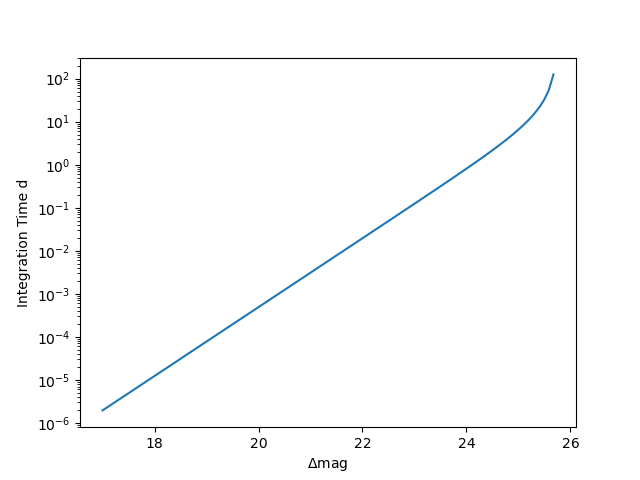

In [32]:
TL = sim6.TargetList
# define an array of target delta mag values
# between just below the PDF at the IWA out to just above the
# pre-computed saturation deltaMag
dMags1 = np.linspace(17, TL.saturation_dMag[sInd] + 0.1, 100)
sInds = np.array([sInd] * len(dMags1))

# use the default values of local and exo-zodiacal light:
fZ = (
    [TL.ZodiacalLight.fZ0.value] * len(dMags1) * TL.ZodiacalLight.fZ0.unit
)  # local zodiacal light
fEZ = (
    [TL.ZodiacalLight.fEZ0.value] * len(dMags1) * TL.ZodiacalLight.fEZ0.unit
)  # exo-zodiacal light

# Use the first available observing mode
mode = TL.OpticalSystem.observingModes[0]

# use coronagraph parameters at the nominal angular separation:
WAs = [TL.int_WA[sInd].value] * len(sInds) * TL.int_WA.unit

# compute integration time
intTimes1 = TL.OpticalSystem.calc_intTime(TL, sInds, fZ, fEZ, dMags1, WAs, mode)

# plot results
plt.figure()
plt.semilogy(dMags1, intTimes1)
plt.xlabel("$\\Delta$mag")
plt.ylabel(f"Integration Time {intTimes1.unit}")
print(
    "Note that all integration time values above the "
    "saturation dMag are NaN (infeasible): "
    f"{intTimes1[dMags1 > TL.saturation_dMag[sInd]]}"
)

We can now compute completeness as a function of integration time:

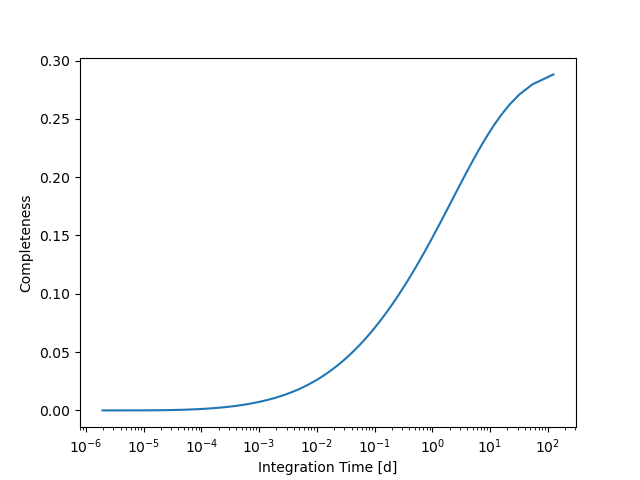

In [33]:
# first we'll remove the NaN integration times
TL = sim6.TargetList
intTimes1 = intTimes1[dMags1 < TL.saturation_dMag[sInd]]
dMags1 = dMags1[dMags1 < TL.saturation_dMag[sInd]]

# compute the projected inner and outer workign angles:
projIWA = np.tan(mode["IWA"]) * TL.dist[sInd]  # projected IWA
projOWA = np.tan(mode["OWA"]) * TL.dist[sInd]  # projected OWA

# compute completeness
comp1 = TL.Completeness.comp_calc(
    projIWA.to(u.AU).value, projOWA.to(u.AU).value, dMags1
)

plt.figure()
plt.semilogx(intTimes1, comp1)
plt.xlabel(f"Integration Time [{intTimes1.unit}]")
plt.ylabel("Completeness");

We can also invert the integration time calculation to compute the achievable $\Delta$mag as a function of integration time:

In [34]:
TL = sim6.TargetList
sInds = np.array([sInd] * len(dMags1))
# local zodiacal light:
fZ = [TL.ZodiacalLight.fZ0.value] * len(dMags1) * TL.ZodiacalLight.fZ0.unit
# exo-zodiacal light
fEZ = [TL.ZodiacalLight.fEZ0.value] * len(dMags1) * TL.ZodiacalLight.fEZ0.unit
# use coronagraph parameters at this nominal separation
WAs = [TL.int_WA[sInd].value] * len(sInds) * TL.int_WA.unit
# compute completeness as function of integration time:
dMags2 = TL.OpticalSystem.calc_dMag_per_intTime(
    intTimes1, TL, sInds, fZ, fEZ, WAs, mode
)
print(f"Maximum difference: {np.max(np.abs(dMags1 - dMags2))}")

Maximum difference: 3.552713678800501e-15


Finally, we have the ability to evaluate the rate of change of completeness as a function of integration time (formally, the derivative $\frac{\mathrm{d}c}{\mathrm{d}t}$):

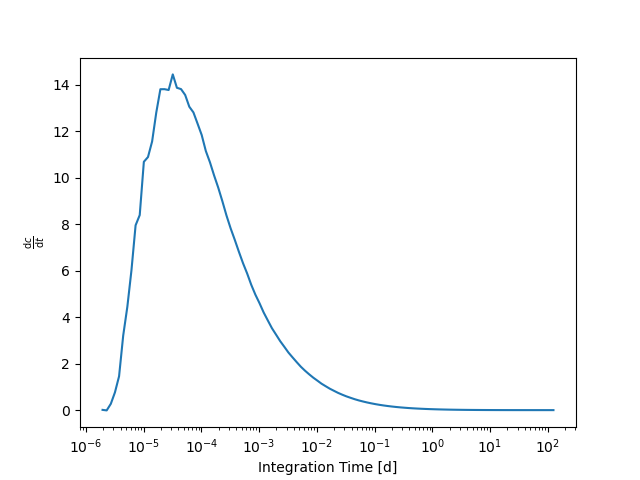

In [35]:
TL = sim6.TargetList
dcdt1 = TL.Completeness.dcomp_dt(
    intTimes1,
    TL,
    sInds,
    TL.ZodiacalLight.fZ0,
    TL.ZodiacalLight.fEZ0,
    TL.int_WA[sInd],
    mode,
).to("1/d")

plt.figure()
plt.semilogx(intTimes1, dcdt1)
plt.xlabel(f"Integration Time [{intTimes1.unit}]")
plt.ylabel("$\\frac{\\mathrm{d}c}{\\mathrm{d}t}$");

# 5. Observatory and Keepout

Let's set up an observatory and define our keepout regions.  We'll use a nominal Sun-Earth L$_2$ point halo orbit.  The keepout is defined for each starlight suppression system by a series of keywords defining the minimum and maximum angular separation between the line of sight and the Sun, Earth, Moon, and all other major solar system bodies.  We'll set the solar keepout as outside of 40$^\circ$ and 90$^\circ$, and ignore the others.  This is consistent with a well-baffled telescope and either solar panel-induced restrictions (from solar panels mounted orthogonally to the telescope aperture) or the keepout imposed by reflection from a starshade. 

In [36]:
specs7 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "ppFact": 0.1,
    "eta": 3,
    "arange": [0.09084645, 30],
    "smaknee": 10,
    "FoV": 2.0,
    "koAngles_Sun": [40, 90], # set solar keepout angles
    "missionLife": 1,  # set mission duration to 1 year
    "missionPortion": 1,  # allocate 100% of available time to exoplanet imaging
    "modules": {
        "PlanetPopulation": "SAG13",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": "ObservatoryL2Halo",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": "BrownCompleteness",
        "TargetList": " ",
        "SimulatedUniverse": "SAG13Universe",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}

sim7 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs7))

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 395279465
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported BrownCompleteness (implementation) from EXOSIMS.Completeness.BrownCompleteness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loading cached completeness fil

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	       haloStartTime (ObservatoryL2Halo)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


The `SurveySimulation` object automatically constructs keepout maps---boolean arrays of target availability as a function of mission time---for each defined starlight suppression system. Let's take a look at one:

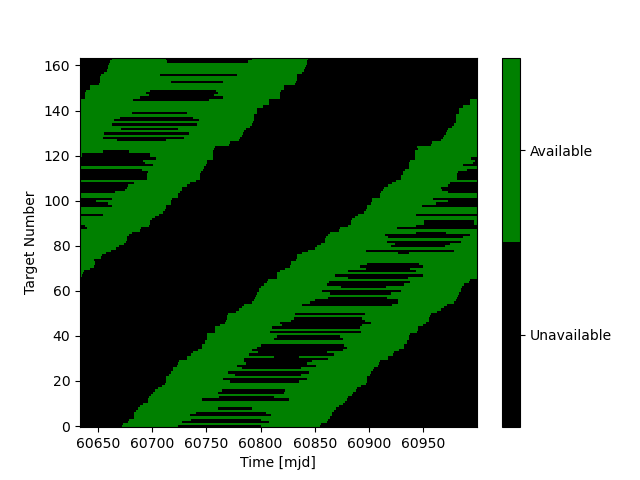

In [37]:
coords = (
    sim7.TargetList.coords.heliocentrictrueecliptic
)  # grab target coordinates in ecliptic coords
sInds = np.argsort(coords.lon)
cmap = matplotlib.colors.ListedColormap(["black", "green"])
plt.figure()
plt.pcolor(
    sim7.SurveySimulation.koTimes.value,
    np.arange(sim7.TargetList.nStars),
    sim7.SurveySimulation.koMaps[
        sim7.OpticalSystem.starlightSuppressionSystems[0]["name"]
    ][sInds],
    cmap=cmap,
)
plt.ylabel("Target Number")
plt.xlabel(f"Time [{sim7.SurveySimulation.koTimes.format}]")
cbar = plt.colorbar(ticks=[0.25, 0.75], drawedges=True)
cbar.ax.set_yticklabels(["Unavailable", "Available"]);

As we sorted the targets by their ecliptic longitudes, there is some structure in the keepout map. The regions of target availability move along with target ecliptic longitude over the course of the year.  Most targets have at least two discrete gaps in availability (corresponding to being below the minimum or above the maximum keepout angle value).  Total availability is inversely proportional to ecliptic latitude (i.e., targets near the poles are available more than targets near the ecliptic).  We can demonstrate this by summing over the rows of our keepout map (which gives us the total number of days available):  

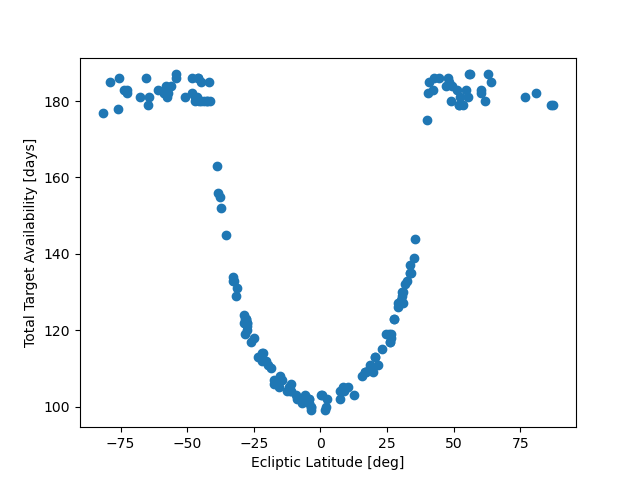

In [38]:
totavail = np.sum(
    sim7.SurveySimulation.koMaps[
        sim7.OpticalSystem.starlightSuppressionSystems[0]["name"]
    ],
    axis=1,
)
plt.figure()
plt.scatter(coords.lat, totavail)
plt.xlabel("Ecliptic Latitude [deg]")
plt.ylabel("Total Target Availability [days]");

While we're here, let's also take a quick look at the orbit our observatory is on:

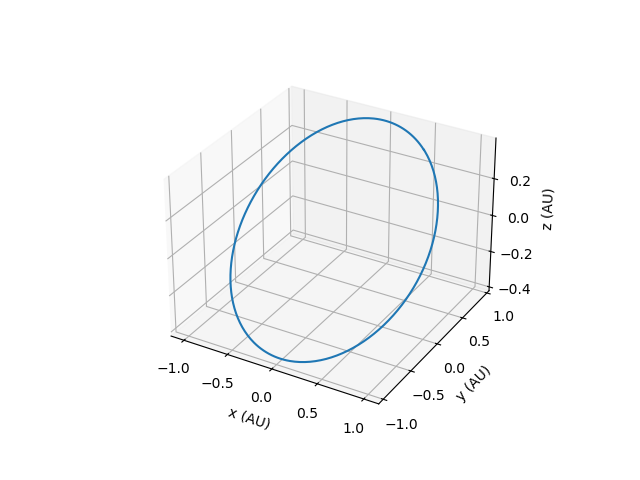

In [39]:
orbit = sim7.Observatory.orbit(sim7.SurveySimulation.koTimes)
ax = plt.figure().add_subplot(projection="3d")

ax.plot(orbit[:, 0], orbit[:, 1], orbit[:, 2])
ax.set_xlabel("x (AU)")
ax.set_ylabel("y (AU)")
ax.set_zlabel("z (AU)");

Unsurprisingly, this looks a lot like Earth's orbit (it's actually tracking the orbit of $L_2$, which orbits slightly beyond Earth).  In order to see the periodicity of the halo, we need to plot this in the rotating frame:

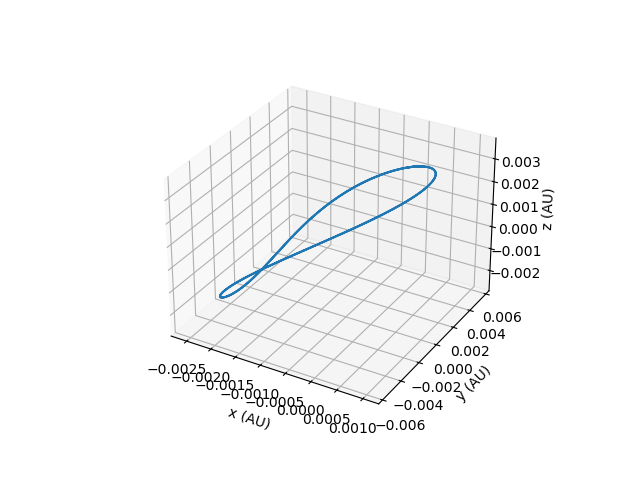

In [40]:
rotframeorbit = sim7.Observatory.haloPosition(sim7.SurveySimulation.koTimes)
ax = plt.figure().add_subplot(projection="3d")

ax.plot(rotframeorbit[:, 0], rotframeorbit[:, 1], rotframeorbit[:, 2])
ax.set_xlabel("x (AU)")
ax.set_ylabel("y (AU)")
ax.set_zlabel("z (AU)");

# 6. Running a Simulation

Finally, let's create a new instance of our final simulation configuration and actually run the survey:

In [41]:
specs7 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "ppFact": 0.1,
    "eta": 3,
    "arange": [0.09084645, 30],
    "smaknee": 10,
    "FoV": 2.0,
    "koAngles_Sun": [40, 90], # set solar keepout angles
    "missionLife": 1,  # set mission duration to 1 year
    "missionPortion": 1,  # allocate 100% of available time to exoplanet imaging
    "modules": {
        "PlanetPopulation": "SAG13",
        "StarCatalog": "HWOMissionStars",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": "ObservatoryL2Halo",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": "BrownCompleteness",
        "TargetList": " ",
        "SimulatedUniverse": "SAG13Universe",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}
sim7 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs7))

sim7.run_sim()

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 843605251
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /Users/ds264/.EXOSIMS/downloads/HWOStarList_20240526125022.pkl
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported BrownCompleteness (implementation) from EXOSIMS.Completeness.BrownCompleteness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loading cached completeness fil

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py:278: UserWarning: 
The following init keywords were not found in any outspec:
	make_debug_bird_plots (SurveySimulation)
	       haloStartTime (ObservatoryL2Halo)
	     debug_plot_path (SurveySimulation)

  warnings.warn(warnstr)


  Observation #3, star ind 82 (of 164) with 5 planet(s), mission time at Obs start: 8.0 d, exoplanetObsTime: 8.0 d
   - Detected planet inds [468 469] (2/5)
   - Charact. planet inds [468 469] (2/2 detected)
  Observation #4, star ind 81 (of 164) with 6 planet(s), mission time at Obs start: 17.76 d, exoplanetObsTime: 17.76 d
   - Detected planet inds [464 467] (2/6)
   - Charact. planet inds [464 467] (2/2 detected)
  Observation #5, star ind 87 (of 164) with 1 planet(s), mission time at Obs start: 22.96 d, exoplanetObsTime: 22.96 d
  Observation #6, star ind 75 (of 164) with 6 planet(s), mission time at Obs start: 25.37 d, exoplanetObsTime: 25.37 d
   - Detected planet inds [434 435] (2/6)
   - Charact. planet inds [434 435] (2/2 detected)
  Observation #7, star ind 41 (of 164) with 9 planet(s), mission time at Obs start: 29.46 d, exoplanetObsTime: 29.46 d
   - Detected planet inds [223 225 228 231] (4/9)
   - Charact. planet inds [223 225 228 231] (4/4 detected)
  Observation #8, sta

The simulated set of observations is encoded in a list of dictionaries stored in attribute `sim.SurveySimulation.DRM`. Each dictionary includes information about the observation.  We can look at one of them to see what information is available:

In [42]:
sim7.SurveySimulation.DRM[0]

{'star_ind': 37,
 'star_name': 'HIP 71681',
 'arrival_time': <Quantity 0. d>,
 'OB_nb': 0,
 'ObsNum': 1,
 'plan_inds': array([197, 198, 199, 200, 201, 202]),
 'det_time': <Quantity 0.00312986 d>,
 'det_status': array([-2, -2, -2,  1,  1, -2]),
 'det_SNR': array([ 0.        ,  0.        ,  0.        , 28.08210388, 12.51894703,
         0.        ]),
 'det_fZ': <Quantity 6.30957344e-10 1 / arcsec2>,
 'det_params': {'WA': <Quantity [4.04817879, 2.00626388, 2.78838417, 1.00798244, 0.84476102,
             3.65353414] arcsec>,
  'd': <Quantity [6.8625582 , 2.67592819, 8.71891153, 1.5712607 , 1.19751085,
             7.09274039] AU>,
  'dMag': array([23.93627445, 25.0234727 , 30.79916467, 23.13483979, 24.00350551,
         27.01660936]),
  'fEZ': <Quantity [1.44942066e-11, 6.76271897e-11, 6.98144574e-12, 1.51913036e-10,
             3.96164917e-10, 1.03032521e-11] 1 / arcsec2>,
  'phi': array([0.69075099, 0.34534549, 0.00886544, 0.62211313, 0.50834286,
         0.770823  ])},
 'char_time': <

We can quickly collect information about all observations via python's list comprehensions. For example, we can identify which stars we observed in this simulation:

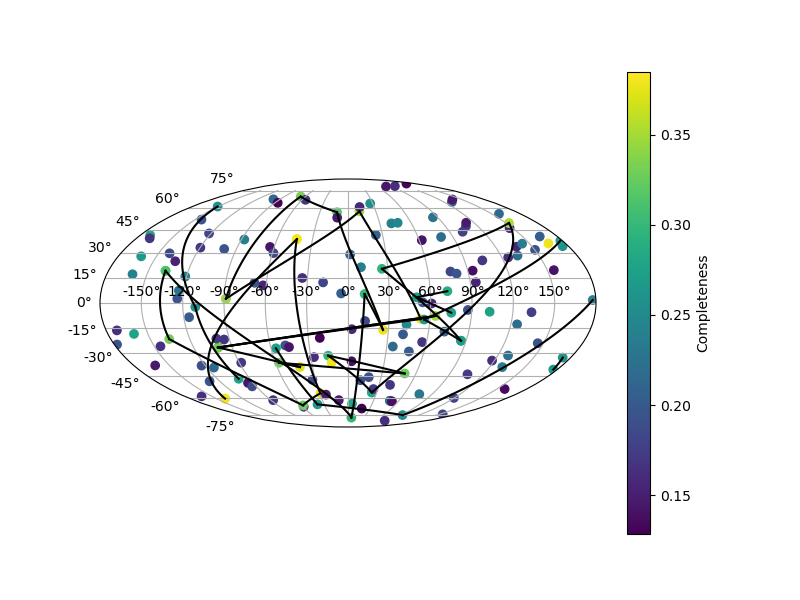

In [43]:
sInds = [row["star_ind"] for row in sim7.SurveySimulation.DRM]  # observed stars

ra = sim7.TargetList.coords.ra.wrap_at(180 * u.degree).rad  # all stars
dec = sim7.TargetList.coords.dec.rad

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
p = ax.scatter(ra, dec, c=sim7.TargetList.int_comp)
ax.grid(True)
plt.colorbar(p, label="Completeness")
diffs = np.abs(np.diff(ra[sInds]))
for j in range(1, len(sInds)):
    if diffs[j - 1] < np.pi:
        plt.plot(ra[sInds[j - 1 : j + 1]], dec[sInds[j - 1 : j + 1]], "k");

Because this simulation did not include a starshade, there is little penalty for transitioning between targets that are further apart from one another, and so we see the scheduler prioritizing higher-completeness targets whenever they are available.

Let's see what happens if we try to run the simulation again:

In [44]:
sim7.run_sim()

OB0: survey beginning.
missionLife would be exceeded at 363.98 d
exoplanetObstime (363.98 d) would exceed (missionPortion*missionLife) = 365.25 d) at currentTimeNorm = 363.98 d
Last Observing Block (# 0, end time: 365.25 d) would be exceeded at currentTimeNorm 363.98 d
Mission complete: no more time available.
Simulation duration: 0 s.
Results stored in SurveySimulation.DRM (Design Reference Mission).


Unsurprisingly, we're out of time.  Before we can re-run the simulation, we have to reset, which we can do via the `reset_sim` method:

In [45]:
sim7.reset_sim?

Signature: sim7.reset_sim(genNewPlanets=True, rewindPlanets=True, seed=None)
Docstring: Convenience method that simply calls the SurveySimulation reset_sim method.
File:      ~/Documents/gitrepos/EXOSIMS/EXOSIMS/MissionSim.py
Type:      method

Note that we have the option to generate entirely new planets (default) or to simply rewind the planets we already have back to their initial positions.  Let's try the latter:

In [46]:
sim7.reset_sim(genNewPlanets=False)

OBendTimes is: [365.25] d
Numpy random seed is: 968718846
Loading cached keepout map file from /Users/ds264/.EXOSIMS/cache/koMap_1ff6b36982ba497bcc2c64754ef594d0.komap
Keepout Map loaded from cache.
coronagraph
Loading cached fZ from /Users/ds264/.EXOSIMS/cache/BrownCompletenessTargetListOpticalSystemb3d7c9310f0ec1a1b3ce4d37df35dc16_164_coronagraph.starkfZ
Loading cached fZmins from /Users/ds264/.EXOSIMS/cache/BrownCompletenessTargetListOpticalSystemb3d7c9310f0ec1a1b3ce4d37df35dc16_164_coronagraph.fZmin
    orbitdatapath (/Users/ds264/.EXOSIMS/cache/L2_halo_orbit_six_month.p) exists
Simulation reset.


In [47]:
sim7.run_sim()

OB0: survey beginning.
  Observation #1, star ind 37 (of 164) with 6 planet(s), mission time at Obs start: 0.0 d, exoplanetObsTime: 0.0 d
   - Detected planet inds [200 201] (2/6)
   - Charact. planet inds [200 201] (2/2 detected)
  Observation #2, star ind 38 (of 164) with 7 planet(s), mission time at Obs start: 4.0 d, exoplanetObsTime: 4.0 d
   - Detected planet inds [203 208] (2/7)
   - Charact. planet inds [203 208] (2/2 detected)
  Observation #3, star ind 82 (of 164) with 5 planet(s), mission time at Obs start: 8.0 d, exoplanetObsTime: 8.0 d
   - Detected planet inds [468 469] (2/5)
   - Charact. planet inds [468 469] (2/2 detected)
  Observation #4, star ind 81 (of 164) with 6 planet(s), mission time at Obs start: 17.76 d, exoplanetObsTime: 17.76 d
   - Detected planet inds [464 467] (2/6)
   - Charact. planet inds [464 467] (2/2 detected)
  Observation #5, star ind 87 (of 164) with 1 planet(s), mission time at Obs start: 22.96 d, exoplanetObsTime: 22.96 d
  Observation #6, star

We see that we ended up with the essentially the same mission schedule and outcomes as with our first attempt. 

# Exercise: Choose another star and re-create some or all of the integration time calculations

Have fun!